In [1]:
import pickle
import shap
import numpy as np
import pandas as pd
import traceback
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from scipy.stats import wasserstein_distance
from matplotlib.ticker import ScalarFormatter

In [3]:
namedic2 = {}
namedic2['baseline'] = 'LR'
namedic2['randomforest'] = 'RF'
namedic2['adv_rew'] = 'SREW'
namedic2['lfr'] = 'LFR'
namedic2['adv_deb'] = 'ADDEB'
namedic2['egr'] = 'EGR'
namedic2['gsr'] = 'GSR'
namedic2['caleq'] = 'CALEQ'
namedic2['rocv'] = 'ROC'
namedic2['mdro'] = 'MDRO'
namedic2['soft'] = 'SOFT'
namedic2['private'] = 'PRIV'
namedic2['ARL'] = 'ARL'
namedic2['dro'] = 'DRO'
def algnames(name):
    return namedic2[name]

In [40]:
namedic2.keys()

dict_keys(['baseline', 'randomforest', 'adv_rew', 'lfr', 'adv_deb', 'egr', 'gsr', 'caleq', 'rocv', 'mdro', 'soft', 'private', 'ARL', 'dro'])

In [5]:
plt.show()

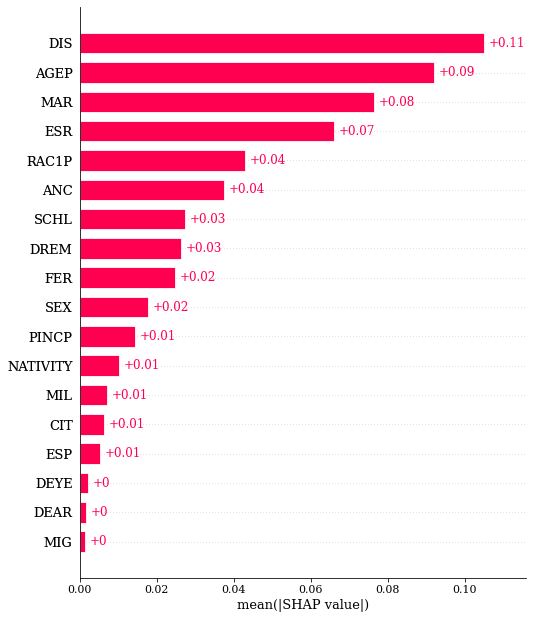

In [8]:
plt.rcParams["font.family"] = 'DejaVu Serif'
plt.rcParams["pdf.fonttype"] = 42
plt.rcParams["ps.fonttype"] = 42

shap_values = pickle.load(open('SavedShap/publiccov_ca_baseline_0.pkl','rb'))
# ax = plt.gca()
# ax.xaxis.grid(True,which='both')
# ax.yaxis.grid(False,which='both')
shap.plots.bar(shap_values,max_display=18, show=False)
plt.savefig('Sample_KShap.pdf', pad_inches = 0,bbox_inches = "tight")
plt.show()

In [32]:
allshaps = {}
for alg in namedic2.keys():
    if alg not in allshaps:
        allshaps[alg]={}
    for frac in [0,0.2,0.4,0.6,0.8]:
        if frac not in allshaps[alg]:
            allshaps[alg][frac]={}
        try:
            shap_values = pickle.load(open('SavedShap/publiccov_ca_'+alg+'_'+str(frac)+'.pkl','rb'))
            meanshap = shap_values.values.mean(axis=0)
            shapdict = {}
            for k,v in zip(shap_values.feature_names,meanshap):
                shapdict[k]=v
            allshaps[alg][frac] = shapdict
        except:
            traceback.print_exc()            

In [33]:
allshaps['baseline']

{0: {'SCHL': -0.004303333333333333,
  'MAR': -0.020133333333333326,
  'SEX': 0.00394,
  'DIS': -0.0005333333333333312,
  'ESP': 0.0012900000000000023,
  'CIT': -0.0006533333333333342,
  'MIG': -0.0001599999999999998,
  'MIL': -0.0011333333333333351,
  'ANC': -0.003820000000000002,
  'NATIVITY': -0.0013566666666666666,
  'DEAR': 0.0009666666666666683,
  'DEYE': -0.0011966666666666675,
  'DREM': 0.0017233333333333408,
  'ESR': 0.009836666666666669,
  'FER': -0.004866666666666662,
  'RAC1P': -0.002140000000000001,
  'AGEP': 0.0039599999999999965,
  'PINCP': 0.002580000000000001},
 0.2: {'SCHL': -0.001436666666666667,
  'MAR': -0.012393333333333322,
  'SEX': -0.003703333333333329,
  'DIS': -0.03792666666666669,
  'ESP': -0.0002499999999999997,
  'CIT': -0.0016366666666666671,
  'MIG': 5.000000000000001e-05,
  'MIL': -0.0011066666666666664,
  'ANC': 0.0024866666666666657,
  'NATIVITY': -0.0014999999999999998,
  'DEAR': -5.999999999999961e-05,
  'DEYE': 0.0007233333333333324,
  'DREM': -0.01

In [31]:
allshaps['baseline']

{0: {'race': -0.002030000000000001,
  'sex': 0.0012571428571428551,
  'age': 0.004260000000000002,
  'admissiontypeid': -0.0011500000000000015,
  'dischargedispositionid': -0.0014100000000000024,
  'admissionsourceid': 0.00578428571428571,
  'timeinhospital': 0.008504285714285723,
  'numlabprocedures': 0.002294285714285713,
  'numprocedures': 0.00016999999999999963,
  'nummedications': -0.002204285714285711,
  'numberoutpatient': 0.011415714285714288,
  'numberemergency': 0.010737142857142846,
  'numberinpatient': -0.0227557142857143,
  'diag1': -0.000764285714285715,
  'diag2': -0.0007285714285714291,
  'diag3': -8.714285714285748e-05,
  'numberdiagnoses': 0.004088571428571428,
  'maxgluserum': 0.00017285714285714278,
  'A1Cresult': -0.00044285714285714306,
  'metformin': -0.004330000000000002,
  'glimepiride': 0.0007957142857142853,
  'glipizide': 0.0008814285714285689,
  'glyburide': -0.0003314285714285722,
  'pioglitazone': -2.2857142857142577e-05,
  'rosiglitazone': -0.00074714285

In [49]:
def aggregate_dicts(dicts, operation=lambda x: sum(x) / len(x)):
    """
    Aggregate a sequence of dictionaries to a single dictionary using `operation`. `Operation` should
    reduce a list of all values with the same key. Keyrs that are not found in one dictionary will
    be mapped to `None`, `operation` can then chose how to deal with those.
    """
    all_keys = set().union(*[el.keys() for el in dicts])
    return {k: operation([dic.get(k, None) for dic in dicts]) for k in all_keys}

def mean_no_none(l):
    l_no_none = [el for el in l if el is not None]
    return sum(l_no_none) / len(l_no_none)

In [165]:
allshaps_avg = {}
for alg in allshaps:
    dicts_diff_keys = list(allshaps[alg].values())
    aggd = aggregate_dicts(dicts_diff_keys, operation= mean_no_none)
    allshaps_avg[algnames(alg)] = {}
    for feature in aggd:
        if np.isnan(aggd[feature]/sum(aggd.values())):
            allshaps_avg[algnames(alg)][feature] = 0
        else:
            allshaps_avg[algnames(alg)][feature] = aggd[feature]/sum(aggd.values())

In [166]:
Dist_dic = {}
for i in allshaps_avg:
    Dist_dic[i] = {}
    for j in allshaps_avg:
        ks = list(allshaps_avg[i].keys())
        ks.sort()
        d1 = []
        d2 = []
        for k in ks:
            if k in allshaps_avg[i]:
                d1.append(allshaps_avg[i][k])
            else:
                d1.append(0)
                
            if k in allshaps_avg[j]:
                d2.append(allshaps_avg[j][k])
            else:
                d2.append(0)
        Dist_dic[i][j] = wasserstein_distance(d1,d2)

In [167]:
distframe = pd.DataFrame(Dist_dic)
distframe

,LR,RF,SREW,LFR,ADDEB,EGR,GSR,CALEQ,ROC,MDRO,SOFT,PRIV,ARL,DRO
LR,0.000000,0.273242,0.352312,0.137205,0.272769,0.423818,0.153299,0.563168,0.294165,0.368983,0.425207,1.279766,2.071487,0.169969
RF,0.273242,0.000000,0.111152,0.282815,0.076750,0.163100,0.192697,0.820135,0.135517,0.159162,0.178837,1.545116,2.312397,0.132692
SREW,0.352312,0.111152,0.000000,0.376443,0.117907,0.079340,0.260407,0.914310,0.079321,0.116413,0.106912,1.632078,2.411362,0.202445
LFR,0.137205,0.282815,0.376443,0.000000,0.271086,0.441781,0.164424,0.540032,0.313069,0.394283,0.449987,1.271708,2.055268,0.181833
ADDEB,0.272769,0.076750,0.117907,0.271086,0.000000,0.181125,0.169550,0.803077,0.106638,0.164850,0.191682,1.522061,2.311448,0.112061
EGR,0.423818,0.163100,0.079340,0.441781,0.181125,0.000000,0.334736,0.979648,0.155732,0.101721,0.082194,1.698699,2.475154,0.268447
GSR,0.153299,0.192697,0.260407,0.164424,0.169550,0.334736,0.000000,0.659904,0.212418,0.275727,0.328448,1.375782,2.179681,0.116124
CALEQ,0.563168,0.820135,0.914310,0.540032,0.803077,0.979648,0.659904,0.000000,0.845146,0.932150,0.987854,0.802731,1.551702,0.713145
ROC,0.294165,0.135517,0.079321,0.313069,0.106638,0.155732,0.212418,0.845146,0.000000,0.163549,0.168954,1.561099,2.361300,0.155651
MDRO,0.368983,0.159162,0.116413,0.394283,0.164850,0.101721,0.275727,0.932150,0.163549,0.000000,0.061213,1.648748,2.431465,0.220773


In [168]:
import seaborn as sns
sns.set(rc={'figure.figsize':(14,12)})
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})

plt.rcParams['figure.figsize'] = (14,12)
plt.rcParams["font.family"] = 'DejaVu Serif'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"
plt.rcParams["pdf.fonttype"] = 42
plt.rcParams["ps.fonttype"] = 42

In [169]:
matrix = np.triu(distframe)

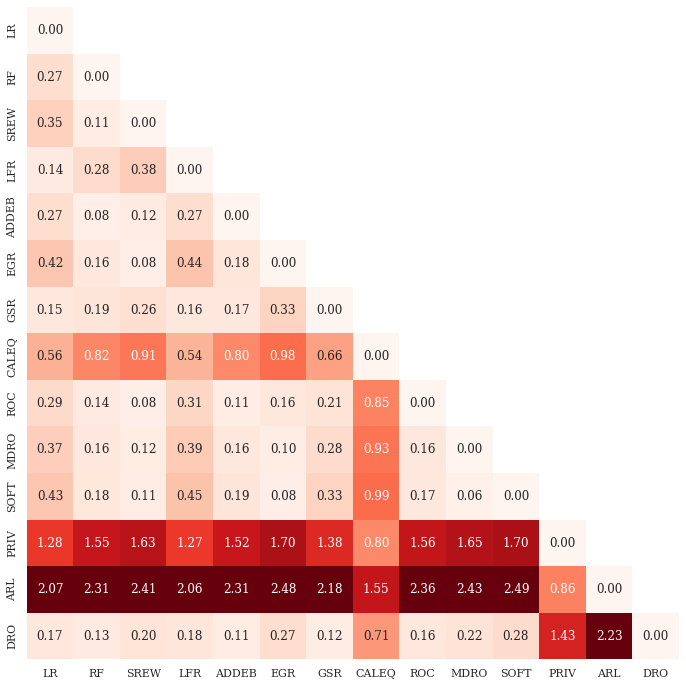

In [172]:
sns.heatmap(distframe, annot=True, cmap="Reds", square = True, vmax = 2, vmin = 0, fmt = ".2f", mask=matrix, annot_kws={"size":12}, cbar=False)

plt.savefig('Wass_diabetes.pdf', pad_inches = 0,bbox_inches = "tight")

## Get rank of SEX

In [7]:
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams["font.family"] = 'DejaVu Serif'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"
plt.rcParams["pdf.fonttype"] = 42
plt.rcParams["ps.fonttype"] = 42

In [26]:
def get_df(item):
    allshaps = {}
    for alg in namedic2.keys():
        if alg not in allshaps:
            allshaps[alg]={}
        for frac in [0,0.2,0.4,0.6,0.8]:
            if frac not in allshaps[alg]:
                allshaps[alg][frac]={}
            try:
                shap_values = pickle.load(open('SavedShap/'+item+'_'+alg+'_'+str(frac)+'.pkl','rb'))
                meanshap = np.abs(shap_values.values).mean(axis=0)
                shapdict = {}
                for k,v in zip(shap_values.feature_names,meanshap):
                    shapdict[k]=v
                allshaps[alg][frac] = shapdict
            except:
                traceback.print_exc()  

    allshaps_sexrank = {}
    for alg in allshaps:
        allshaps_sexrank[algnames(alg)] = []
        for frac in allshaps[alg]:
            x = allshaps[alg][frac]
            r = {key: rank for rank, key in enumerate(sorted(set(x.values()), reverse=True), 1)}
            td = {k: r[v] for k,v in x.items()}

            if algnames(alg) in ['DRO', 'EGR', 'GSR']:
                allshaps_sexrank[algnames(alg)].append(len(td))
            else:
                if 'SEX' in td:
                    allshaps_sexrank[algnames(alg)].append(td['SEX'])
                else:
                    allshaps_sexrank[algnames(alg)].append(td['sex'])

    df = pd.DataFrame(allshaps_sexrank)

    return df

In [27]:
allshaps_sexrank

NameError: name 'allshaps_sexrank' is not defined

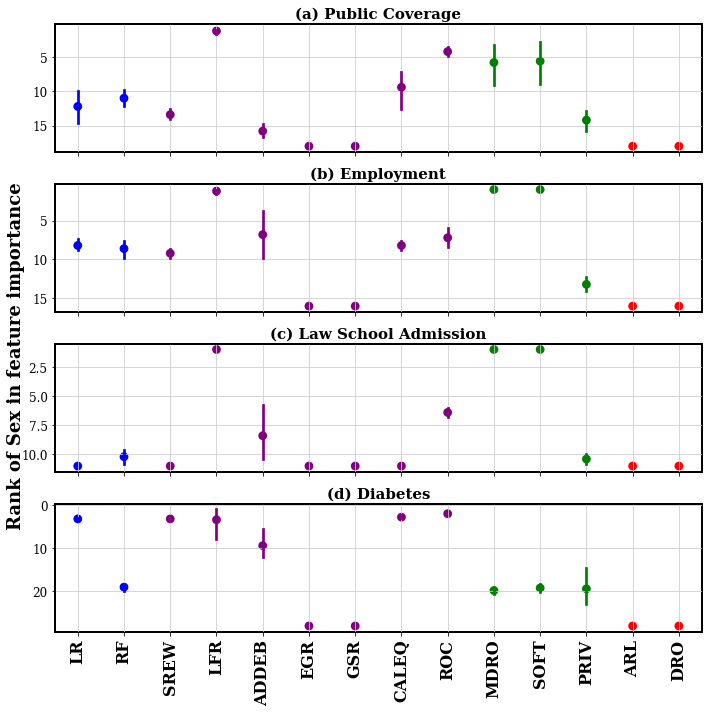

In [28]:
fig, axs = plt.subplots(4,1, sharex= True, figsize=(10, 10))

items  = ['publiccov_ca', 'employment_ca', 'law_school', 'diabetes']
titles = ['(a) Public Coverage', '(b) Employment', '(c) Law School Admission', '(d) Diabetes']

for ax,item,title in zip(axs.flatten(),items,titles):
    
    df = get_df(item)
    
    plt.rcParams["axes.grid"] = True

    colors = ['blue', 'blue', 'purple', 'purple', 'purple', 'purple','purple','purple','purple','green', 'green', 'green', 'red', 'red']

    ax = sns.pointplot(ax = ax,data = df, join=False, dodge=True, palette = colors)
#     ax.tick_params(axis='x', labelrotation=90,weight='bold')
    ax.set_xticklabels(list(namedic2.values()), rotation=90, weight='bold', size=16)
    ax.xaxis.grid(True,which='both')
    ax.yaxis.grid(True,which='both')
    plt.xticks(visible = True)
    ax.invert_yaxis()
    ax.yaxis.set_major_formatter(ScalarFormatter())
    ax.yaxis.set_minor_formatter(ScalarFormatter())
#     ax.xaxis.set_tick_params(labelsize=16)
    ax.yaxis.set_tick_params(labelsize=12)
    ax.set_title(title, fontsize=15,weight='bold')
    ax.patch.set_edgecolor('black')  
    ax.patch.set_linewidth(2)  
fig.supylabel('Rank of Sex in feature importance',fontsize=18,weight='bold', x = 0.02)
fig.tight_layout()
plt.savefig('Rankplots.pdf', pad_inches = 0,bbox_inches = "tight")
plt.show()